# 二酸化炭素の運動

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## 定数の定義

In [4]:
k = 1.0    # バネ定数
m = 16.0    # O原子の質量
M = 12.0   # C原子の質量

## 運動方程式

次の二酸化炭素モデルを考えていた。

<img src="image\figure1.png" style="max-width:30%; height:auto;">

運動方程式は

<img src="image\equationofmotion.png" style="max-width:30%; height:auto;">

上の運動方程式をコードでかくと、

In [5]:
# ODE
def equations(y, t, k, m, M):
    x1, v1, x2, v2, x3, v3 = y
    dydt = [
        v1,
        k * (x2 - x1) / m,
        v2,
        ((-k) * (x2 - x1) + k * (x3 - x2)) / M,
        v3,
        (-k) * (x3 - x2) / m
    ]
    return dydt

<img src="image\sol1.png" style="max-width:50%; height:auto;" >

運動方程式から解いて出てきた条件は**a_1=a_3**

ここで、ω=ω_1の場合**初期条件**を次のように与える。

In [6]:
# 初期条件
x1_0 = 0.1  # 左側O原子の初期位置
v1_0 = 0.0  # 左側O原子の初期速度
x2_0 = 0.0  # 中央C原子の初期位置
v2_0 = 0.0  # 中央C原子の初期速度
x3_0 = -0.1 # 右側O原子の初期位置
v3_0 = 0.0  # 右側O原子の初期速度

y0 = [x1_0, v1_0, x2_0, v2_0, x3_0, v3_0]

In [7]:
# 時間範囲
t = np.linspace(0, 50, 1000)

In [8]:
# ODEの解を求める
sol = odeint(equations, y0, t, args=(k, m, M))

## ω=ω_1の場合の結果

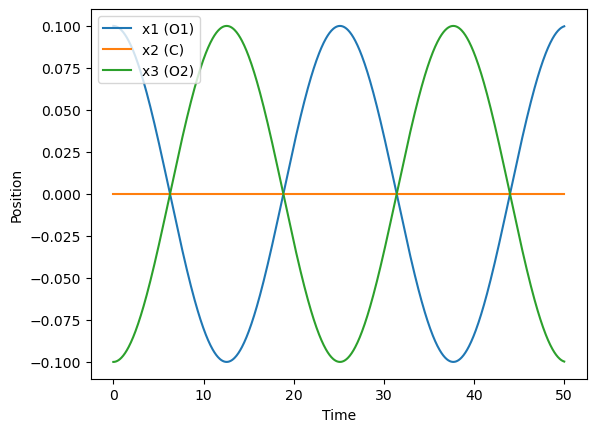

In [9]:
# 結果のプロット
plt.plot(t, sol[:, 0], label='x1 (O1)')
plt.plot(t, sol[:, 2], label='x2 (C)')
plt.plot(t, sol[:, 4], label='x3 (O2)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

続けてω=ω_2の場合を見ていく。

<img src="image\sol2.png" style="max-width:50%; height:auto;" >

運動方程式から解いて出てきた条件は**a_1=-a_3**

**初期条件**は次のように与えられる。

In [10]:
# 初期条件
x1_0 = 0.1  # 左側O原子の初期位置
v1_0 = 0.0  # 左側O原子の初期速度
x2_0 = 0.0  # 中央C原子の初期位置
v2_0 = 0.0  # 中央C原子の初期速度
x3_0 = 0.1 # 右側O原子の初期位置
v3_0 = 0.0  # 右側O原子の初期速度

y0 = [x1_0, v1_0, x2_0, v2_0, x3_0, v3_0]

In [11]:
# ODEの解を求める
sol = odeint(equations, y0, t, args=(k, m, M))

## ω=ω_2の場合の結果

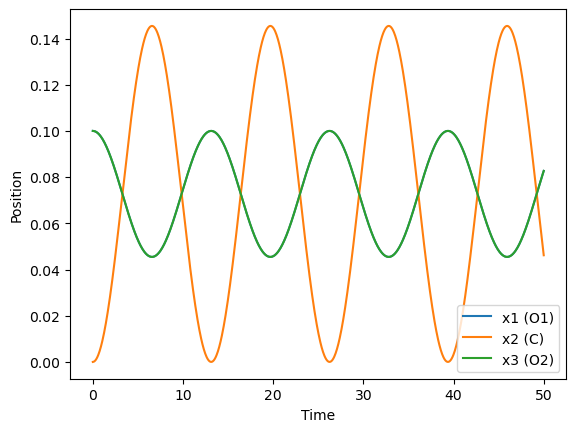

In [12]:
# 結果のプロット
plt.plot(t, sol[:, 0], label='x1 (O1)')
plt.plot(t, sol[:, 2], label='x2 (C)')
plt.plot(t, sol[:, 4], label='x3 (O2)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

x_1の結果が見えない。ここで、先ほどの微分方程式の結果を表示させてみよう。

In [13]:
print(sol)

[[ 1.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e-01  0.00000000e+00]
 [ 9.99921724e-02 -3.12778895e-04  2.08735317e-05  8.34077054e-04
   9.99921724e-02 -3.12778895e-04]
 [ 9.99686942e-02 -6.25382166e-04  8.34822132e-05  1.66768578e-03
   9.99686942e-02 -6.25382166e-04]
 ...
 [ 8.14567011e-02  1.23689737e-02  4.94487972e-02 -3.29839299e-02
   8.14567011e-02  1.23689737e-02]
 [ 8.20732037e-02  1.22653084e-02  4.78047902e-02 -3.27074890e-02
   8.20732037e-02  1.22653084e-02]
 [ 8.26843414e-02  1.21546023e-02  4.61750896e-02 -3.24122727e-02
   8.26843414e-02  1.21546023e-02]]


上記のリストの0番目がx_1、4番目がx_3であることから、x_1とx_3が一致していることが分かる。